In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Read in csv files, create dataframes

median_household_income_df = pd.DataFrame(pd.read_csv('exploring_data_in_foster_care\Resources\median_household_income.csv'))
dropouts_df = pd.DataFrame(pd.read_csv('exploring_data_in_foster_care\Resources\dropouts.csv'))
in_foster_df = pd.DataFrame(pd.read_csv('exploring_data_in_foster_care\Resources\children_in_foster_care.csv'))

In [13]:
#preview all three dataframes. Examine column types and first 5 rows.
print('median_household_income_df')
display(median_household_income_df.dtypes)
display(median_household_income_df.head())
print('dropouts_df')
display(dropouts_df.dtypes)
display(dropouts_df.head())
print('in_foster_df')
display(in_foster_df.dtypes)
in_foster_df.head()

median_household_income_df


LocationType                      object
Location                          object
Children in Immigrant Families    object
TimeFrame                         object
DataFormat                        object
Data                              object
dtype: object

,LocationType,Location,Children in Immigrant Families,TimeFrame,DataFormat,Data
0,Nation,United States,Children in immigrant families,2005,Currency,46500
1,Nation,United States,Children in U.S.-born families,2005,Currency,54700
2,Nation,United States,Children in U.S.-born families,2006,Currency,57000
3,Nation,United States,Children in immigrant families,2006,Currency,46800
4,Nation,United States,Children in immigrant families,2007,Currency,49200


dropouts_df


LocationType    object
Location        object
TimeFrame        int64
DataFormat      object
Data            object
dtype: object

,LocationType,Location,TimeFrame,DataFormat,Data
0,Nation,United States,2000,Number,1554000
1,State,Alabama,2000,Number,31000
2,State,Alaska,2000,Number,3000
3,State,Arizona,2000,Number,49000
4,State,Arkansas,2000,Number,17000


in_foster_df


LocationType    object
Location        object
TimeFrame        int64
DataFormat      object
Data             int64
dtype: object

,LocationType,Location,TimeFrame,DataFormat,Data
0,Nation,United States,2000,Number,543035
1,State,Alabama,2000,Number,5611
2,State,Alaska,2000,Number,2192
3,State,Arizona,2000,Number,6470
4,State,Arkansas,2000,Number,3043


In [14]:
#begin cleaning data

#drop LocationType and  DataFormat columns
median_household_income_df = median_household_income_df[['Location', 'TimeFrame', 'Data']]
dropouts_df = dropouts_df[['Location', 'TimeFrame', 'Data']]
in_foster_df = in_foster_df[['Location', 'TimeFrame', 'Data']]


In [15]:
#Change column names
median_household_income_df.columns = ['State', 'Year', 'Median Household Income']
dropouts_df.columns = ['State', 'Year', 'Youth In Foster Care Who Graduated On Time']
in_foster_df.columns = ['State', 'Year', 'Children In Foster Care']

#check
display(median_household_income_df.head())
display(dropouts_df.head())
display(in_foster_df.head())

#check number of rows
print(f'median_df has {len(median_household_income_df.iloc[:]["State"])} rows')
print(f'dropouts_df has {len(dropouts_df.iloc[:]["State"])} rows')
print(f'median_df has {len(in_foster_df.iloc[:]["State"])} rows')


,State,Year,Median Household Income
0,United States,2005,46500
1,United States,2005,54700
2,United States,2006,57000
3,United States,2006,46800
4,United States,2007,49200


,State,Year,Youth In Foster Care Who Graduated On Time
0,United States,2000,1554000
1,Alabama,2000,31000
2,Alaska,2000,3000
3,Arizona,2000,49000
4,Arkansas,2000,17000


,State,Year,Children In Foster Care
0,United States,2000,543035
1,Alabama,2000,5611
2,Alaska,2000,2192
3,Arizona,2000,6470
4,Arkansas,2000,3043


median_df has 2014 rows
dropouts_df has 2332 rows
median_df has 2308 rows


In [16]:
#drop rows where 'State' = United States
median_household_income_df = median_household_income_df.loc[:][median_household_income_df['State'] != 'United States']
dropouts_df = dropouts_df.loc[:][dropouts_df['State'] != 'United States']
in_foster_df = in_foster_df.loc[:][in_foster_df['State'] != 'United States']

#check number of rows
print(f'median_df has {len(median_household_income_df.iloc[:]["State"])} rows')
print(f'dropouts_df has {len(dropouts_df.iloc[:]["State"])} rows')
print(f'median_df has {len(in_foster_df.iloc[:]["State"])} rows')

#check data
display(median_household_income_df.head())

median_df has 1976 rows
dropouts_df has 2288 rows
median_df has 2264 rows


,State,Year,Median Household Income
38,Alabama,2021,63400
39,Alabama,2021,67300
40,Alabama,2019,55400
41,Alabama,2019,61700
42,Alabama,2017,44600


In [17]:
#drop null values. In these data sets, null values are filled with 'N.A.' string
#next line figured out using ChatGPT.
median_household_income_df['Median Household Income'] = pd.to_numeric(median_household_income_df['Median Household Income'], errors='coerce')
dropouts_df['Youth In Foster Care Who Graduated On Time'] = pd.to_numeric(dropouts_df['Youth In Foster Care Who Graduated On Time'], errors='coerce')
in_foster_df['Children In Foster Care'] = pd.to_numeric(in_foster_df['Children In Foster Care'], errors='coerce')

median_household_income_df = median_household_income_df.dropna(subset=['Median Household Income'])
dropouts_df = dropouts_df.dropna(subset=['Youth In Foster Care Who Graduated On Time'])
in_foster_df = in_foster_df.dropna(subset=['Children In Foster Care'])

#check number of rows
print(f'median_df has {len(median_household_income_df.iloc[:]["State"])} rows')
print(f'dropouts_df has {len(dropouts_df.iloc[:]["State"])} rows')
print(f'in_foster has {len(in_foster_df.iloc[:]["State"])} rows')

median_df has 1970 rows
dropouts_df has 2270 rows
in_foster has 2264 rows


In [18]:
#check column types

display(median_household_income_df.dtypes)
display(dropouts_df.dtypes)
in_foster_df.dtypes


State                       object
Year                        object
Median Household Income    float64
dtype: object

State                                          object
Year                                            int64
Youth In Foster Care Who Graduated On Time    float64
dtype: object

State                      object
Year                        int64
Children In Foster Care     int64
dtype: object

In [19]:
#convert 'Year' column in median_income_df to an int, drop rows that do not convert
median_household_income_df['Year'] = pd.to_numeric(median_household_income_df['Year'], errors='coerce').fillna(0).astype(int)
median_household_income_df = median_household_income_df.loc[:][median_household_income_df['Year'] != 0]
#check conversion
display(median_household_income_df.dtypes)
print(f'median_df has {len(median_household_income_df.iloc[:]["State"])} rows')
print(min(median_household_income_df['Year']))

State                       object
Year                         int32
Median Household Income    float64
dtype: object

median_df has 1664 rows
2005


In [20]:
#convert 'Year' columns to datetime
median_household_income_df['Year'] = pd.to_datetime(median_household_income_df['Year'].astype(str) + '-01-01')
dropouts_df['Year'] = pd.to_datetime(dropouts_df['Year'].astype(str) + '-01-01')
in_foster_df['Year'] = pd.to_datetime(in_foster_df['Year'].astype(str) + '-01-01')

In [21]:
#Need to average median income data, as it's currently divided by familiy nativity
median_income_avgs = median_household_income_df.groupby(by=['State', 'Year'])['Median Household Income'].mean()
median_avg_df = pd.DataFrame(median_income_avgs)
median_avg_df.head(50)

Median Household Income
State    Year                               
Alabama  2005-01-01                  42850.0
         2006-01-01                  44050.0
         2007-01-01                  45200.0
         2008-01-01                  49050.0
         2009-01-01                  42400.0
         2010-01-01                  42000.0
         2011-01-01                  43350.0
         2012-01-01                  43800.0
         2013-01-01                  47200.0
         2014-01-01                  43050.0
         2015-01-01                  46200.0
         2016-01-01                  51500.0
         2017-01-01                  50850.0
         2018-01-01                  56100.0
         2019-01-01                  58550.0
         2021-01-01                  65350.0
Alaska   2005-01-01                  64400.0
         2006-01-01                  60850.0
         2007-01-01                  65450.0
         2008-01-01                  75550.0
         2009-01-01                  71050.0
         2010-01-01                  72850.0
         2011-01-01                  63850.0
         2012-01-01                  66350.0
         2013-01-01                  75050.0
         2014-01-01                  65750.0
         2015-01-01                  67750.0
         2016-01-01                  83600.0
         2017-01-01                  78200.0
         2018-01-01                  82100.0
         2019-01-01                  83100.0
         2021-01-01                  89100.0
Arizona  2005-01-01                  43850.0
         2006-01-01                  47000.0
         2007-01-01                  49250.0
         2008-01-01                  49950.0
         2009-01-01                  48400.0
         2010-01-01                  43850.0
         2011-01-01                  43250.0
         2012-01-01                  45150.0
         2013-01-01                  46200.0
         2014-01-01                  48750.0
         2015-01-01                  49550.0
         2016-01-01                  53050.0
         2017-01-01                  57550.0
         2018-01-01                  61000.0
         2019-01-01                  65600.0
         2021-01-01                  72400.0
Arkansas 2005-01-01                  40500.0
         2006-01-01                  39400.0

In [24]:
#convert dropout_df and in_foster_df to the same format, with State and Year as the two indexes
dropouts_df = pd.pivot_table(dropouts_df,
                                         index = ['State', 'Year'],
                                         values = 'Youth In Foster Care Who Graduated On Time')

dropouts_df.head()

Youth In Foster Care Who Graduated On Time
State   Year                                                  
Alabama 2000-01-01                                   15500.065
        2001-01-01                                   13500.060
        2002-01-01                                   18000.075
        2003-01-01                                   12000.050
        2004-01-01                                    7500.035

In [27]:
#converting in_foster_df same as above
in_foster_df = pd.pivot_table(in_foster_df,
                                         index = ['State', 'Year'],
                                         values = 'Children In Foster Care')

in_foster_df.head(50)

Children In Foster Care
State   Year                               
Alabama 2000-01-01                   2808.0
        2001-01-01                   2925.0
        2002-01-01                   2938.0
        2003-01-01                   3036.5
        2004-01-01                   2964.5
        2005-01-01                   3452.5
        2006-01-01                   3576.5
        2007-01-01                   3630.5
        2008-01-01                   3432.5
        2009-01-01                   3440.0
        2010-01-01                   2677.0
        2011-01-01                   2590.0
        2012-01-01                   2232.0
        2013-01-01                   2209.5
        2014-01-01                   2221.0
        2015-01-01                   2306.0
        2016-01-01                   2462.0
        2017-01-01                   2755.5
        2018-01-01                   2909.5
        2019-01-01                   2844.0
        2020-01-01                   2746.0
        2021-01-01                   2649.5
Alaska  2000-01-01                   1102.0
        2001-01-01                   1001.5
        2002-01-01                   1041.0
        2003-01-01                   1025.0
        2004-01-01                    919.5
        2005-01-01                    899.0
        2006-01-01                   1014.0
        2007-01-01                   1101.0
        2008-01-01                   1090.0
        2009-01-01                   1089.0
        2010-01-01                    905.5
        2011-01-01                    924.0
        2012-01-01                    937.0
        2013-01-01                    989.5
        2014-01-01                   1099.0
        2015-01-01                   1331.5
        2016-01-01                   1412.5
        2017-01-01                   1380.5
        2018-01-01                   1400.0
        2019-01-01                   1444.5
        2020-01-01                   1433.0
        2021-01-01                   1418.0
Arizona 2000-01-01                   3237.5
        2001-01-01                   3026.5
        2002-01-01                   3086.0
        2003-01-01                   3735.0
        2004-01-01                   4598.5
        2005-01-01                   4843.5

In [32]:
#prepare to merge, check data one final time

#check column types

display(median_avg_df.dtypes)
display(dropouts_df.dtypes)
display(in_foster_df.dtypes)

#check data

display(median_avg_df.head())
display(dropouts_df.head())
display(in_foster_df.head())

#check number of rows
print(f'median_df has {len(median_avg_df)} rows')
print(f'dropouts_df has {len(dropouts_df)} rows')
print(f'in_foster has {len(in_foster_df)} rows')

Median Household Income    float64
dtype: object

Youth In Foster Care Who Graduated On Time    float64
dtype: object

Children In Foster Care    float64
dtype: object

Median Household Income
State   Year                               
Alabama 2005-01-01                  42850.0
        2006-01-01                  44050.0
        2007-01-01                  45200.0
        2008-01-01                  49050.0
        2009-01-01                  42400.0

Youth In Foster Care Who Graduated On Time
State   Year                                                  
Alabama 2000-01-01                                   15500.065
        2001-01-01                                   13500.060
        2002-01-01                                   18000.075
        2003-01-01                                   12000.050
        2004-01-01                                    7500.035

Children In Foster Care
State   Year                               
Alabama 2000-01-01                   2808.0
        2001-01-01                   2925.0
        2002-01-01                   2938.0
        2003-01-01                   3036.5
        2004-01-01                   2964.5

median_df has 832 rows
dropouts_df has 1136 rows
in_foster has 1132 rows


In [33]:
# Merge dataframes
# Merge median_income and dropouts dataframes
income_dropouts_df = pd.merge(median_avg_df, dropouts_df, on=['State', 'Year'])
display(income_dropouts_df.head())

# Merge with in_foster dataframe
merged_df = pd.merge(income_dropouts_df, in_foster_df, on=['State', 'Year'])
display(merged_df.head())

Median Household Income  \
State   Year                                  
Alabama 2005-01-01                  42850.0   
        2006-01-01                  44050.0   
        2007-01-01                  45200.0   
        2008-01-01                  49050.0   
        2009-01-01                  42400.0   

                    Youth In Foster Care Who Graduated On Time  
State   Year                                                    
Alabama 2005-01-01                                   11000.045  
        2006-01-01                                   12000.045  
        2007-01-01                                   13000.050  
        2008-01-01                                   10500.040  
        2009-01-01                                    9500.035

Median Household Income  \
State   Year                                  
Alabama 2005-01-01                  42850.0   
        2006-01-01                  44050.0   
        2007-01-01                  45200.0   
        2008-01-01                  49050.0   
        2009-01-01                  42400.0   

                    Youth In Foster Care Who Graduated On Time  \
State   Year                                                     
Alabama 2005-01-01                                   11000.045   
        2006-01-01                                   12000.045   
        2007-01-01                                   13000.050   
        2008-01-01                                   10500.040   
        2009-01-01                                    9500.035   

                    Children In Foster Care  
State   Year                                 
Alabama 2005-01-01                   3452.5  
        2006-01-01                   3576.5  
        2007-01-01                   3630.5  
        2008-01-01                   3432.5  
        2009-01-01                   3440.0

In [34]:
#double check df, notice that it only included rows that have all the data available, meaning it only goes from 2005 - 2019 and 2021 because those were available years from median_df
merged_df.head(50)

Median Household Income  \
State    Year                                  
Alabama  2005-01-01                  42850.0   
         2006-01-01                  44050.0   
         2007-01-01                  45200.0   
         2008-01-01                  49050.0   
         2009-01-01                  42400.0   
         2010-01-01                  42000.0   
         2011-01-01                  43350.0   
         2012-01-01                  43800.0   
         2013-01-01                  47200.0   
         2014-01-01                  43050.0   
         2015-01-01                  46200.0   
         2016-01-01                  51500.0   
         2017-01-01                  50850.0   
         2018-01-01                  56100.0   
         2019-01-01                  58550.0   
         2021-01-01                  65350.0   
Alaska   2005-01-01                  64400.0   
         2006-01-01                  60850.0   
         2007-01-01                  65450.0   
         2008-01-01                  75550.0   
         2009-01-01                  71050.0   
         2010-01-01                  72850.0   
         2011-01-01                  63850.0   
         2012-01-01                  66350.0   
         2013-01-01                  75050.0   
         2014-01-01                  65750.0   
         2015-01-01                  67750.0   
         2016-01-01                  83600.0   
         2017-01-01                  78200.0   
         2018-01-01                  82100.0   
         2019-01-01                  83100.0   
         2021-01-01                  89100.0   
Arizona  2005-01-01                  43850.0   
         2006-01-01                  47000.0   
         2007-01-01                  49250.0   
         2008-01-01                  49950.0   
         2009-01-01                  48400.0   
         2010-01-01                  43850.0   
         2011-01-01                  43250.0   
         2012-01-01                  45150.0   
         2013-01-01                  46200.0   
         2014-01-01                  48750.0   
         2015-01-01                  49550.0   
         2016-01-01                  53050.0   
         2017-01-01                  57550.0   
         2018-01-01                  61000.0   
         2019-01-01                  65600.0   
         2021-01-01                  72400.0   
Arkansas 2005-01-01                  40500.0   
         2006-01-01                  39400.0   

                     Youth In Foster Care Who Graduated On Time  \
State    Year                                                     
Alabama  2005-01-01                                   11000.045   
         2006-01-01                                   12000.045   
         2007-01-01                                   13000.050   
         2008-01-01                                   10500.040   
         2009-01-01                                    9500.035   
         2010-01-01                                   10500.040   
         2011-01-01                                    8500.030   
         2012-01-01                                    8000.030   
         2013-01-01                                    6500.025   
         2014-01-01                                    7000.025   
         2015-01-01                                    5500.020   
         2016-01-01                                    5000.020   
         2017-01-01                                    6500.025   
         2018-01-01                                    4500.015   
         2019-01-01                                    5000.020   
         2021-01-01                                    6500.025   
Alaska   2005-01-01                                    2000.045   
         2006-01-01                                    1500.035   
         2007-01-01                                    1500.035   
         2008-01-01                                    2000.050   
         2009-01-01                               

In [38]:
#export merged_df to csv
merged_df.to_csv('exploring_data_in_foster_care\Resources\merged_data.csv')

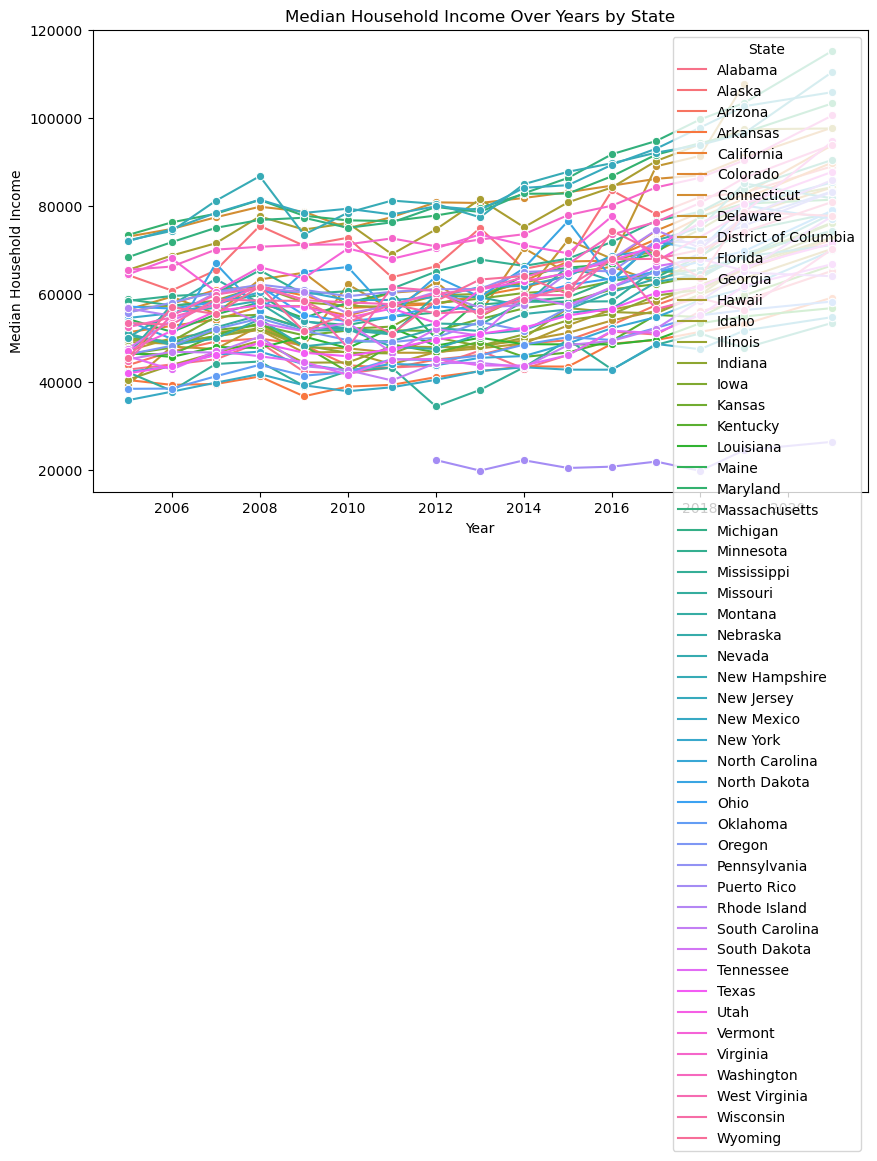

In [36]:
# Use seaborn to create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Median Household Income', hue='State', data=merged_df, marker='o')

# Customize the plot
plt.title('Median Household Income Over Years by State')
plt.xlabel('Year')
plt.ylabel('Median Household Income')
plt.legend(title='State')

# Show the plot
plt.show()

In [ ]:
pd.__version__